In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("strange.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [57]:
# Filtering

## Droping Duplicates

total_rows = len(df.index)
print("Total Rows of The Dataset", total_rows)

# Removing Duplicate Rows
df.drop_duplicates(keep = False, inplace = True)

# Total rows after removing duplicates
total_rows_after_remove_duplicates = len(df.index)

print("Total Rows of The Dataset After Removing Duplicates", total_rows_after_remove_duplicates)
print("There are {} duplicates in the dataset".format(total_rows - total_rows_after_remove_duplicates))


## Droping Gender

df.drop('gender', axis='columns', inplace=True)
df.head()


Total Rows of The Dataset 1000
Total Rows of The Dataset After Removing Duplicates 1000
There are 0 duplicates in the dataset


,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,standard,none,72,72,74
1,group C,some college,standard,completed,69,90,88
2,group B,master's degree,standard,none,90,95,93
3,group A,associate's degree,free/reduced,none,47,57,44
4,group C,some college,standard,none,76,78,75


In [66]:
# Transformation

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = ord_enc.fit_transform(df[[i]])
    #train[i]=pd.get_dummies(train[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   float64
 1   parental level of education  1000 non-null   float64
 2   lunch                        1000 non-null   float64
 3   test preparation course      1000 non-null   float64
 4   math score                   1000 non-null   int64  
 5   reading score                1000 non-null   int64  
 6   writing score                1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 62.5 KB


array([[<AxesSubplot:title={'center':'writing score'}>]], dtype=object)

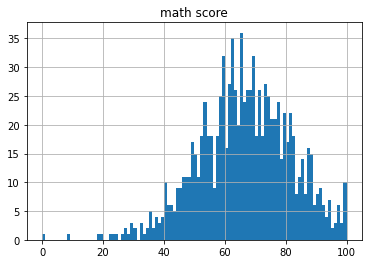

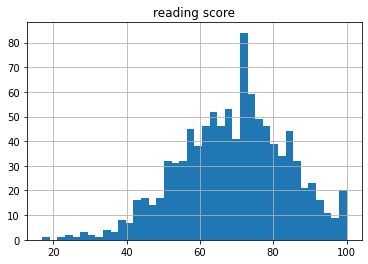

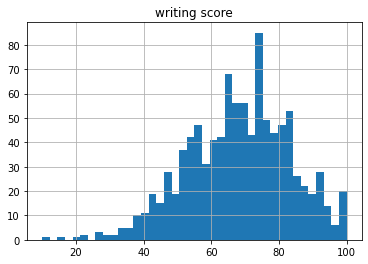

In [59]:
# Component Analysis

df.hist(column = ['math score'], bins= 100)
df.hist(column = ['reading score'], bins= 40)
df.hist(column = ['writing score'], bins= 40)

Scatter Pliot Between Reading Score and Writing Score

Scatter Pliot Between Reading Score and Writing Score


<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

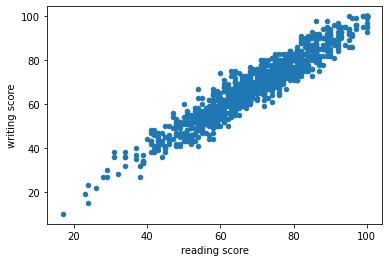

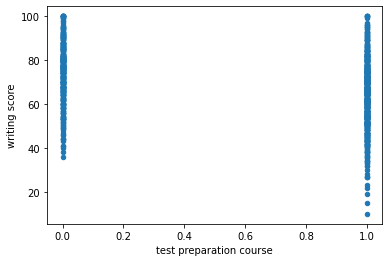

In [60]:
# Visualization

print("Scatter Pliot Between Reading Score and Writing Score")
df.plot.scatter(x='reading score',y='writing score')

print("\nScatter Pliot Between Reading Score and Writing Score")
df.plot.scatter(x='test preparation course',y='writing score')

In [61]:
# Correlation Analysis of the attributes


maximum = -99999

for i in df.columns:
    for j in df.columns:
        if i==j:
            continue
        else:
            correlation = df[i].corr(df[j])
            if correlation > maximum:
                maximum = correlation
                maximum_index1 = i
                maximum_index2 = j
                    
print('\nHighest positive Correlation: ',maximum)      
print('\nThe Correlation is between ',maximum_index1,'and',maximum_index2,'columns') 

print("\n")

minimum = 99999

for i in df.columns:
    for j in df.columns:
        if i==j:
            continue
        else:
            correlation = df[i].corr(df[j])
            if correlation < minimum:
                minimum = correlation
                minimum_index1 = i
                minimum_index2 = j
                    
print('\nHighest negative Correlation: ',minimum)      
print('\nThe Correlation is between ',minimum_index1,'and',minimum_index2,'columns') 

print("\n\nCorrelation between writing score vs rest of the columns:\n")
corr_matrix=df.corr()
print(corr_matrix["writing score"].sort_values(ascending=False))


Highest positive Correlation:  0.954598077146248

The Correlation is between  reading score and writing score columns



Highest negative Correlation:  -0.31294628448595657

The Correlation is between  test preparation course and writing score columns


Correlation between writing score vs rest of the columns:

writing score                  1.000000
reading score                  0.954598
math score                     0.802642
lunch                          0.245769
race/ethnicity                 0.165691
parental level of education   -0.084299
test preparation course       -0.312946
Name: writing score, dtype: float64


In [62]:
## PCA

#train_test_split
from sklearn.model_selection import train_test_split
X = df.drop('writing score',axis=1)
Y = df['writing score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#%%
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_Scaler.fit(X_train)
X_Standard = Standard_Scaler.fit_transform(X_train)
print(X_Standard)
#%%
#pca
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_Standard)
X_ = pca

[[ 0.68533525  0.84610897  0.72299881  0.72779143 -0.24218231 -0.40097854]
 [-1.05396255 -0.79389009  0.72299881  0.72779143 -0.04103089 -0.68310573]
 [-1.05396255  1.39277532 -1.38312815 -1.37402003  0.49537291  1.43284823]
 ...
 [-0.18431365 -1.34055644  0.72299881  0.72779143 -0.91268706 -0.54204214]
 [-0.18431365  0.84610897 -1.38312815 -1.37402003 -1.11383848 -1.52948732]
 [ 0.68533525 -1.34055644  0.72299881  0.72779143  1.23292813  1.50338003]]


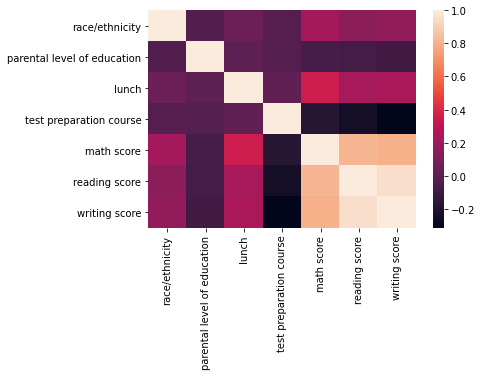

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr());

In [64]:
# Linear Regression

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = df.drop('writing score',axis=1)
Y = df['writing score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

regression = LinearRegression() 
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

print(y_pred)

[ 84.53253312  65.09171094  72.19911945  73.81854268  83.98066674
  73.46059471  70.40274594  61.21875925  71.69181099  54.68939106
  44.71521685  26.18686811  78.98916779  61.78941595  81.92758529
  77.87327681  51.39562103  45.44676778  55.98594815  62.95512102
  70.5568733   51.76604805  71.2887681   50.24015994  78.83046513
  74.20783853  75.17794967  57.10593664  47.75090661  55.4306264
  59.11281142  62.96358153  60.70127126  69.87226204  75.77752944
  50.07490774  75.95835205  74.63149229  75.66610707  14.91510388
  76.78115989  66.38620677  63.31190954  60.18158809  84.8731127
  64.7750521   68.13674124  28.84468232  88.32189096  81.77180055
  75.09487267  74.20648431  79.47648703  55.72342815  70.51283223
  71.90629677  77.19598834  53.58741592  83.10355246  89.03181786
  42.30276878  82.56757778  75.78835111  58.08126988  88.5257325
  73.96698324  67.58096426  51.54792947  63.23710109  92.48952775
  65.55691304  85.58881262  54.74081983  53.72816968  61.11524062
  77.03193831

In [65]:
Merge columns

SyntaxError: invalid syntax (<ipython-input-65-e9081aed7413>, line 1)